<a href="https://colab.research.google.com/github/PurveshBaghele/ML/blob/master/SelfDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/PurveshBaghele/Road_Data

fatal: destination path 'Road_Data' already exists and is not an empty directory.


In [3]:
!ls Road_Data


driving_log.csv  IMG


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os
import ntpath
from imgaug import augmenters as iaa


In [5]:
datadir = 'Road_Data'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth',-1)
data.head()

center  \
0  E:\data\IMG\center_2019_02_23_20_34_38_855.jpg   
1  E:\data\IMG\center_2019_02_23_20_34_38_962.jpg   
2  E:\data\IMG\center_2019_02_23_20_34_39_062.jpg   
3  E:\data\IMG\center_2019_02_23_20_34_39_163.jpg   
4  E:\data\IMG\center_2019_02_23_20_34_39_273.jpg   

                                            left  \
0   E:\data\IMG\left_2019_02_23_20_34_38_855.jpg   
1   E:\data\IMG\left_2019_02_23_20_34_38_962.jpg   
2   E:\data\IMG\left_2019_02_23_20_34_39_062.jpg   
3   E:\data\IMG\left_2019_02_23_20_34_39_163.jpg   
4   E:\data\IMG\left_2019_02_23_20_34_39_273.jpg   

                                            right  steering  throttle  \
0   E:\data\IMG\right_2019_02_23_20_34_38_855.jpg  0.0       0.0        
1   E:\data\IMG\right_2019_02_23_20_34_38_962.jpg  0.0       0.0        
2   E:\data\IMG\right_2019_02_23_20_34_39_062.jpg  0.0       0.0        
3   E:\data\IMG\right_2019_02_23_20_34_39_163.jpg  0.0       0.0        
4   E:\data\IMG\right_2019_02_23_20_34_39_273.jpg  0.0       0.0        

   reverse     speed  
0  0.0      0.000078  
1  0.0      0.000079  
2  0.0      0.000078  
3  0.0      0.000082  
4  0.0      0.000078

In [0]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail

data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)

In [7]:
data.head()

center                              left  \
0  center_2019_02_23_20_34_38_855.jpg  left_2019_02_23_20_34_38_855.jpg   
1  center_2019_02_23_20_34_38_962.jpg  left_2019_02_23_20_34_38_962.jpg   
2  center_2019_02_23_20_34_39_062.jpg  left_2019_02_23_20_34_39_062.jpg   
3  center_2019_02_23_20_34_39_163.jpg  left_2019_02_23_20_34_39_163.jpg   
4  center_2019_02_23_20_34_39_273.jpg  left_2019_02_23_20_34_39_273.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_02_23_20_34_38_855.jpg  0.0       0.0       0.0      0.000078  
1  right_2019_02_23_20_34_38_962.jpg  0.0       0.0       0.0      0.000079  
2  right_2019_02_23_20_34_39_062.jpg  0.0       0.0       0.0      0.000078  
3  right_2019_02_23_20_34_39_163.jpg  0.0       0.0       0.0      0.000082  
4  right_2019_02_23_20_34_39_273.jpg  0.0       0.0       0.0      0.000078

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


<BarContainer object of 25 artists>

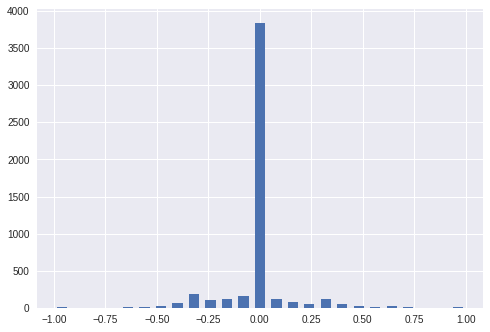

In [8]:
num_bins = 25
hist,bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
print(bins)
samples_per_bin = 200
plt.bar(center,hist,width=0.05)

<BarContainer object of 25 artists>

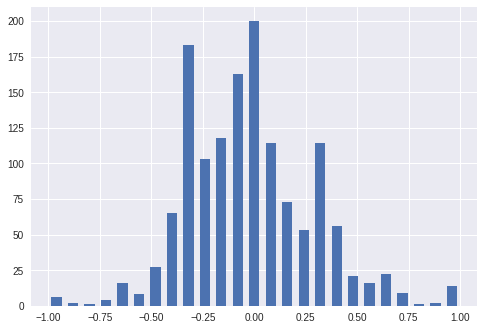

In [9]:
remove_list = []
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>= bins[j] and data['steering'][i]<= bins[j+1]:
      list_.append(i)
   
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)

data.drop(data.index[remove_list],inplace=True)


histt,_=np.histogram(data['steering'],(num_bins))
plt.bar(center,histt,width=0.05)


In [0]:
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  
  return image_paths,steerings

image_path,steering = load_img_steering(datadir+'/IMG',data)
  

In [72]:
X_train,X_val,Y_train,Y_val=train_test_split(image_path,steering,test_size=0.2,random_state=69)
print('Training samples : {} \n Validation samples:{}'.format(len(X_train),len(X_val)))

Training samples : 1112 
 Validation samples:279


In [0]:
def zoom(image):
  zoom = iaa.Affine(scale=(1,1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed image')

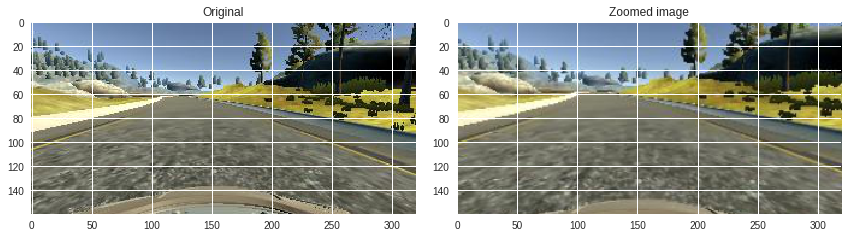

In [24]:
image = image_path[169]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed image')


In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned image')

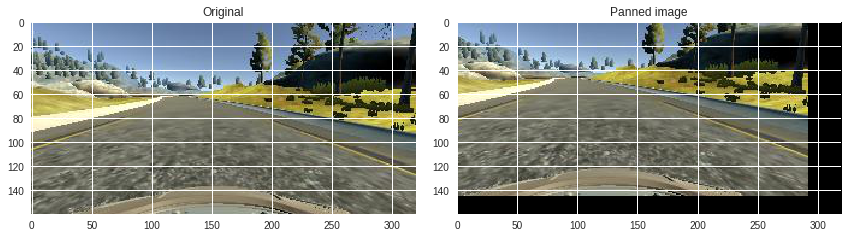

In [32]:
image = image_path[169]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[1].imshow(panned_image)
axs[1].set_title('Panned image')

In [0]:
def alter_brightness(image):
  brightness = iaa.Multiply((0.2,1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Bright image')

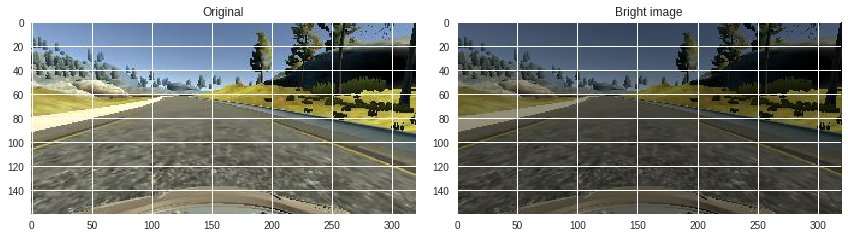

In [40]:
image = image_path[169]
original_image = mpimg.imread(image)
bright_image = alter_brightness(original_image)
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[1].imshow(bright_image)
axs[1].set_title('Bright image')

In [0]:
def flip(image,steering_angle):
  image = cv2.flip(image,1)
  steering_angle= -steering_angle
  return image,steering_angle
  

Text(0.5, 1.0, 'Flipped image Steering angle:0.06910866')

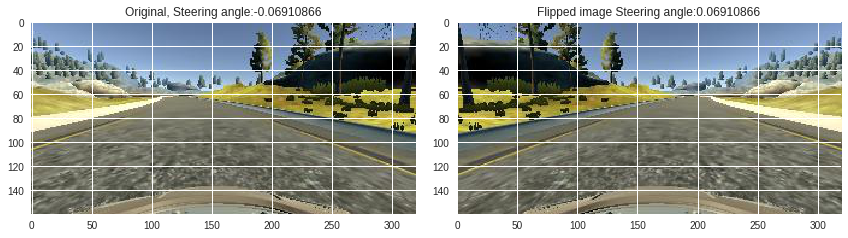

In [45]:
image = image_path[169]
steering_angle=steering[169]
original_image = mpimg.imread(image)
flip_image,steering_angle_flipped = flip(original_image,steering_angle)
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original,' + ' Steering angle:'+str(steering_angle))
axs[1].imshow(flip_image)
axs[1].set_title('Flipped image' + ' Steering angle:'+str(steering_angle_flipped))

In [0]:
def random_augment(image,steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5 :
    image = pan(image)
  
  if np.random.rand() < 0.5 :
    image = zoom(image)
  
  if np.random.rand() < 0.5 :
    image = alter_brightness(image)
    
  if np.random.rand() < 0.5 :
    image,steering_angle = flip(image,steering_angle)
    
  return image,steering_angle

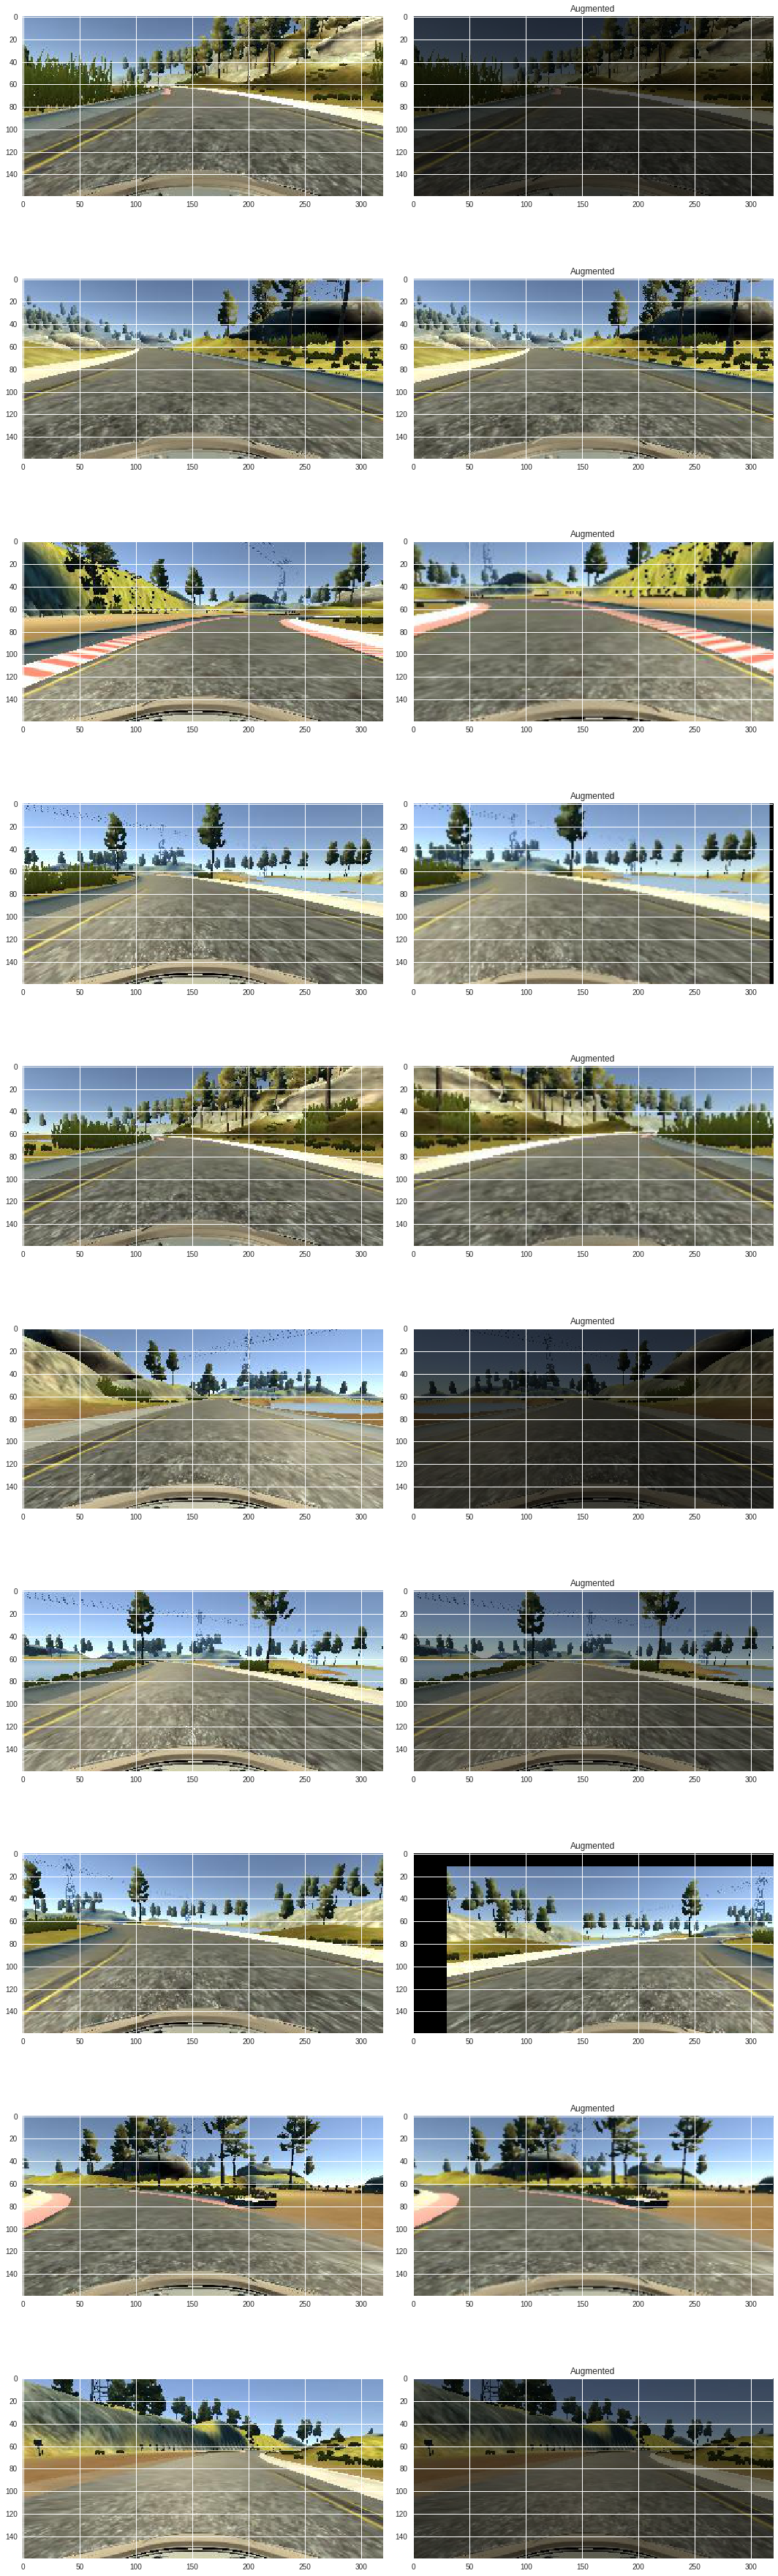

In [52]:
ncol=2
nrow=10
fig,axs=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum=random.randint(0,len(image_path)-1)
  random_image = image_path[randnum]
  random_steering = steering[randnum]
  
  original_image=mpimg.imread(random_image)
  aug_image,steer=random_augment(random_image,random_steering)
  
  axs[i][0].imshow(original_image)
  axs[i][1].set_title('Original')
  axs[i][1].imshow(aug_image)
  axs[i][1].set_title('Augmented')

In [0]:
 def preprocessing(img):
   
    img = img[60:135,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV) #y=luminousity, u & v = chromiance which adds color to the image
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img=img/255
    return img

Text(0.5, 1.0, 'Preprocessed image')

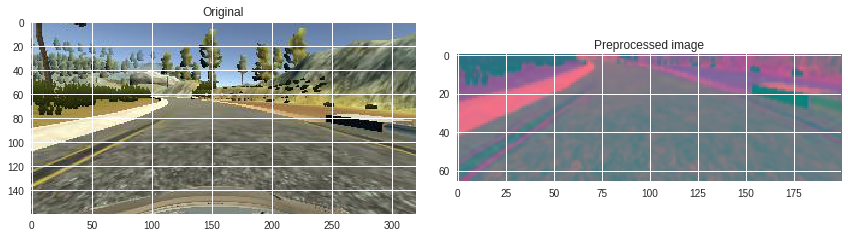

In [13]:
image = image_path[500]
original_image = mpimg.imread(image)
preprocessed_image = preprocessing(image)

fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

In [0]:
def batch_generator(image_paths,steering_ang,batch_size,istraining):
  while True:
    batch_img=[]
    batch_steering=[]
    
    for i in range (batch_size):
      random_index=random.randint(0,len(image_paths)-1)
      
      if istraining:
        image,steering = random_augment(image_paths[random_index],steering_ang[random_index])
      else:
        image = mpimg.imread(image_path[random_index])
        steering = steering_ang[random_index]
        
      img = preprocessing(image)
      batch_img.append(img)
      batch_steering.append(steering)
    yield(np.asarray(batch_img),np.asarray(batch_steering))  

Text(0.5, 1.0, 'validation image')

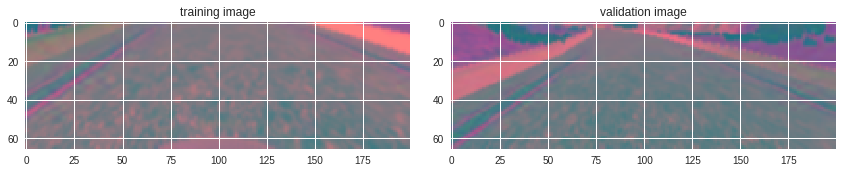

In [79]:
x_train_gen,y_train_gen=next(batch_generator(X_train,Y_train,1,1))
x_val_gen,y_val_gen=next(batch_generator(X_val,Y_val,1,0))
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(x_train_gen[0])
axs[0].set_title('training image')
axs[1].imshow(x_val_gen[0])
axs[1].set_title('validation image')



In [0]:
#X_train=np.array(list(map(preprocessing,X_train)))
#X_val=np.array(list(map(preprocessing,X_val)))

In [0]:
def nvidia_model():
  model=Sequential()
  model.add(Convolution2D(24,5,5,subsample=(2,2),input_shape=(66,200,3),activation='elu'))#subsample(i,j)=strides by row i and column j
  model.add(Convolution2D(36,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(48,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(100,activation='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(50,activation='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10,activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(1))
  
  model.compile(loss='mse',optimizer=Adam(0.0001))
  return model
   

In [87]:
model=nvidia_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [88]:
history =model.fit_generator( batch_generator(X_train,Y_train,100,1),steps_per_epoch=300,epochs=10,validation_data=batch_generator(X_val,Y_val,100,0),validation_steps=200,verbose=1,shuffle=1)

Epoch 1/10
300/300 [==============================] - 233s 775ms/step - loss: 0.0744 - val_loss: 0.1215
Epoch 2/10
300/300 [==============================] - 229s 764ms/step - loss: 0.0620 - val_loss: 0.1235
Epoch 3/10
300/300 [==============================] - 224s 747ms/step - loss: 0.0552 - val_loss: 0.1463
Epoch 4/10
300/300 [==============================] - 229s 764ms/step - loss: 0.0492 - val_loss: 0.1344
Epoch 5/10
300/300 [==============================] - 229s 762ms/step - loss: 0.0459 - val_loss: 0.1274
Epoch 6/10
300/300 [==============================] - 231s 768ms/step - loss: 0.0428 - val_loss: 0.1184
Epoch 7/10
299/300 [============================>.] - ETA: 0s - loss: 0.0411

KeyboardInterrupt: ignored

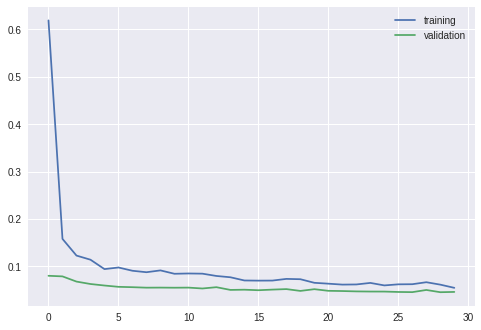

In [18]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])

In [0]:
model.save('model.h5')


In [20]:
from google.colab import files
files.download('model.h5')

KeyboardInterrupt: ignored